x(t+1) = x(t) + change(t+1)

change(t+1) = (momentum * change(t)) – (step_size * gradient(t+1))

gradient(t+1) = f'(projection(t+1))

projection(t+1) = x(t) + (momentum * change(t))

In [1]:
# objective function
def objective(x, y):
	return x**2.0 + y**2.0

In [2]:
objective(2,3)

13.0

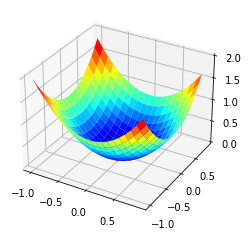

In [3]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.add_subplot(111, projection="3d")
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

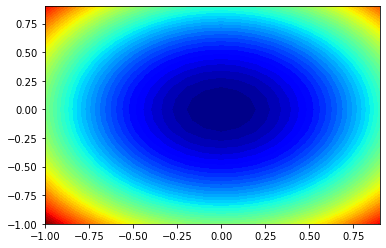

In [5]:
# contour plot of the test function
from numpy import asarray
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
pyplot.show()

In [6]:
# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

In [7]:
from numpy.random import rand
# generate an initial point
solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

In [8]:
solution

array([ 0.94185191, -0.76177367])

In [9]:
momentum = 0.3
change = [0.0 for _ in range(bounds.shape[0])]
...
# calculate the projected solution
projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
# calculate the gradient for the projection
gradient = derivative(projected[0], projected[1])

In [10]:
gradient

array([ 1.88370382, -1.52354734])

In [28]:
change

[0.0, 0.0]

In [12]:
...
step_size = .05
# build a solution one variable at a time
new_solution = list()
for i in range(solution.shape[0]):
	# calculate the change
	change[i] = (momentum * change[i]) - step_size * gradient[i]
	# calculate the new position in this variable
	value = solution[i] + change[i]
	# store this variable
	new_solution.append(value)

In [13]:
...
it = 1
# evaluate candidate point
solution = asarray(new_solution)
solution_eval = objective(solution[0], solution[1])
# report progress
print('>%d f(%s) = %.5f' % (it, solution, solution_eval))

>1 f([ 0.84766672 -0.6855963 ]) = 1.18858


In [14]:
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of changes made to each variable
	change = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate the projected solution
		projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
		# calculate the gradient for the projection
		gradient = derivative(projected[0], projected[1])
		# build a solution one variable at a time
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the change
			change[i] = (momentum * change[i]) - step_size * gradient[i]
			# calculate the new position in this variable
			value = solution[i] + change[i]
			# store this variable
			new_solution.append(value)
		# evaluate candidate point
		solution = asarray(new_solution)
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return [solution, solution_eval]

In [15]:
from numpy.random import seed
...
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with nesterov momentum
best, score = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.13276479  0.35251919]) = 0.14190
>1 f([-0.09824595  0.2608642 ]) = 0.07770
>2 f([-0.07031223  0.18669416]) = 0.03980
>3 f([-0.0495457   0.13155452]) = 0.01976
>4 f([-0.03465259  0.0920101 ]) = 0.00967
>5 f([-0.02414772  0.06411742]) = 0.00469
>6 f([-0.01679701  0.04459969]) = 0.00227
>7 f([-0.01167344  0.0309955 ]) = 0.00110
>8 f([-0.00810909  0.02153139]) = 0.00053
>9 f([-0.00563183  0.01495373]) = 0.00026
>10 f([-0.00391092  0.01038434]) = 0.00012
>11 f([-0.00271572  0.00721082]) = 0.00006
>12 f([-0.00188573  0.00500701]) = 0.00003
>13 f([-0.00130938  0.0034767 ]) = 0.00001
>14 f([-0.00090918  0.00241408]) = 0.00001
>15 f([-0.0006313   0.00167624]) = 0.00000
>16 f([-0.00043835  0.00116391]) = 0.00000
>17 f([-0.00030437  0.00080817]) = 0.00000
>18 f([-0.00021134  0.00056116]) = 0.00000
>19 f([-0.00014675  0.00038964]) = 0.00000
>20 f([-0.00010189  0.00027055]) = 0.00000
>21 f([-7.07505806e-05  1.87858067e-04]) = 0.00000
>22 f([-4.91260884e-05  1.30440372e-04]) = 0.00000
>23 f

In [16]:
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions = list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of changes made to each variable
	change = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate the projected solution
		projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
		# calculate the gradient for the projection
		gradient = derivative(projected[0], projected[1])
		# build a solution one variable at a time
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the change
			change[i] = (momentum * change[i]) - step_size * gradient[i]
			# calculate the new position in this variable
			value = solution[i] + change[i]
			# store this variable
			new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions

In [17]:
...
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# define momentum
momentum = 0.8
# perform the gradient descent search with nesterov momentum
solutions = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)

>0 f([-0.16263687  0.43183601]) = 0.21293
>1 f([-0.15678194  0.41628991]) = 0.19788
>2 f([-0.14905604  0.39577597]) = 0.17886
>3 f([-0.14001781  0.37177753]) = 0.15782
>4 f([-0.13013149  0.34552719]) = 0.13632
>5 f([-0.11977798  0.31803639]) = 0.11549
>6 f([-0.10926527  0.29012287]) = 0.09611
>7 f([-0.09883799  0.26243621]) = 0.07864
>8 f([-0.08868625  0.23548115]) = 0.06332
>9 f([-0.07895356  0.20963876]) = 0.05018
>10 f([-0.06974406  0.18518555]) = 0.03916
>11 f([-0.06112894  0.16231052]) = 0.03008
>12 f([-0.0531521   0.14113029]) = 0.02274
>13 f([-0.04583521  0.12170238]) = 0.01691
>14 f([-0.03918207  0.10403685]) = 0.01236
>15 f([-0.03318236  0.08810634]) = 0.00886
>16 f([-0.02781495  0.0738547 ]) = 0.00623
>17 f([-0.0230506   0.06120431]) = 0.00428
>18 f([-0.01885433  0.05006232]) = 0.00286
>19 f([-0.01518737  0.04032576]) = 0.00186
>20 f([-0.01200873  0.03188577]) = 0.00116
>21 f([-0.0092765   0.02463111]) = 0.00069
>22 f([-0.0069489   0.01845084]) = 0.00039
>23 f([-0.00498509  0

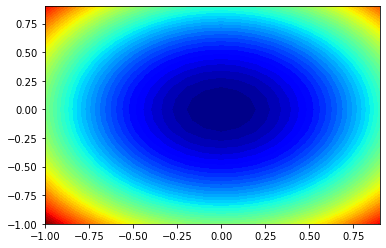

In [18]:
...
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')

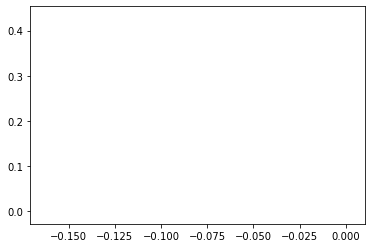

In [35]:
...
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')

>0 f([-0.16263687  0.43183601]) = 0.21293
>1 f([-0.15678194  0.41628991]) = 0.19788
>2 f([-0.14905604  0.39577597]) = 0.17886
>3 f([-0.14001781  0.37177753]) = 0.15782
>4 f([-0.13013149  0.34552719]) = 0.13632
>5 f([-0.11977798  0.31803639]) = 0.11549
>6 f([-0.10926527  0.29012287]) = 0.09611
>7 f([-0.09883799  0.26243621]) = 0.07864
>8 f([-0.08868625  0.23548115]) = 0.06332
>9 f([-0.07895356  0.20963876]) = 0.05018
>10 f([-0.06974406  0.18518555]) = 0.03916
>11 f([-0.06112894  0.16231052]) = 0.03008
>12 f([-0.0531521   0.14113029]) = 0.02274
>13 f([-0.04583521  0.12170238]) = 0.01691
>14 f([-0.03918207  0.10403685]) = 0.01236
>15 f([-0.03318236  0.08810634]) = 0.00886
>16 f([-0.02781495  0.0738547 ]) = 0.00623
>17 f([-0.0230506   0.06120431]) = 0.00428
>18 f([-0.01885433  0.05006232]) = 0.00286
>19 f([-0.01518737  0.04032576]) = 0.00186
>20 f([-0.01200873  0.03188577]) = 0.00116
>21 f([-0.0092765   0.02463111]) = 0.00069
>22 f([-0.0069489   0.01845084]) = 0.00039
>23 f([-0.00498509  0

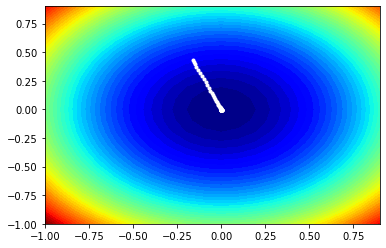

In [4]:
# example of plotting the nesterov momentum search on a contour plot of the test function
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import time
# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions = list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of changes made to each variable
	change = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate the projected solution
		projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
		# calculate the gradient for the projection
		gradient = derivative(projected[0], projected[1])
		# build a solution one variable at a time
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the change
			change[i] = (momentum * change[i]) - step_size * gradient[i]
			# calculate the new position in this variable
			value = solution[i] + change[i]
			# store this variable
			new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions

# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# define momentum
momentum = 0.8
# perform the gradient descent search with nesterov momentum
solutions = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet');
# plot the sample as black circles
solutions = asarray(solutions)
for item in range(len(solutions)):
    pyplot.plot(solutions[item, 0], solutions[item, 1], '.-', color='w');
    #pyplot.pause(0.05)
    
# show the plot
pyplot.show();

In [7]:
solutions.shape

(50, 2)

>0 f([-0.16263687  0.43183601]) = 0.21293
>1 f([-0.15678194  0.41628991]) = 0.19788
>2 f([-0.14905604  0.39577597]) = 0.17886
>3 f([-0.14001781  0.37177753]) = 0.15782
>4 f([-0.13013149  0.34552719]) = 0.13632
>5 f([-0.11977798  0.31803639]) = 0.11549
>6 f([-0.10926527  0.29012287]) = 0.09611
>7 f([-0.09883799  0.26243621]) = 0.07864
>8 f([-0.08868625  0.23548115]) = 0.06332
>9 f([-0.07895356  0.20963876]) = 0.05018
>10 f([-0.06974406  0.18518555]) = 0.03916
>11 f([-0.06112894  0.16231052]) = 0.03008
>12 f([-0.0531521   0.14113029]) = 0.02274
>13 f([-0.04583521  0.12170238]) = 0.01691
>14 f([-0.03918207  0.10403685]) = 0.01236
>15 f([-0.03318236  0.08810634]) = 0.00886
>16 f([-0.02781495  0.0738547 ]) = 0.00623
>17 f([-0.0230506   0.06120431]) = 0.00428
>18 f([-0.01885433  0.05006232]) = 0.00286
>19 f([-0.01518737  0.04032576]) = 0.00186
>20 f([-0.01200873  0.03188577]) = 0.00116
>21 f([-0.0092765   0.02463111]) = 0.00069
>22 f([-0.0069489   0.01845084]) = 0.00039
>23 f([-0.00498509  0

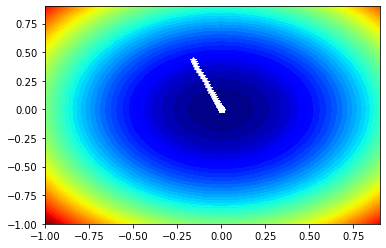

In [19]:
# example of plotting the nesterov momentum search on a contour plot of the test function
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions = list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of changes made to each variable
	change = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate the projected solution
		projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
		# calculate the gradient for the projection
		gradient = derivative(projected[0], projected[1])
		# build a solution one variable at a time
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the change
			change[i] = (momentum * change[i]) - step_size * gradient[i]
			# calculate the new position in this variable
			value = solution[i] + change[i]
			# store this variable
			new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions

# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# define momentum
momentum = 0.8
# perform the gradient descent search with nesterov momentum
solutions = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)

fig, ax = plt.subplots()
# create a filled contour plot with 50 levels and jet color scheme
ax.contourf(x, y, results, levels=50, cmap='jet');
# plot the sample as black circles
solutions = asarray(solutions)
# for item in range(len(solutions)):
plot = ax.plot(solutions[0, 0], solutions[0, 1], '*', color='w')[0]
    #pyplot.pause(0.05)
def animate(iter):
	plot.set_xdata(solutions[:iter, 0])
	plot.set_ydata(solutions[:iter, 1])
	return plot

anim = FuncAnimation(fig, animate, frames=arange(solutions.shape[0]), interval=100, blit=False, repeat=True)
anim.save("nestrov.gif", dpi=120, writer="pillow")
HTML(anim.to_jshtml())

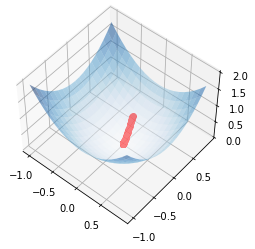

In [24]:
z = objective(solutions[:, 0], solutions[:, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# create a filled contour plot with 50 levels and jet color scheme
plot3d = ax.plot3D(solutions[0, 0], solutions[0, 1], z[0], 'ro', alpha = 1)[0]
ax.plot_surface(x, y, results, rstride=1, cstride=1,
                cmap='Blues', edgecolor='none', alpha = 0.5);
ax.view_init(50, -50)

def animate(iter):
    plot3d.set_xdata(solutions[:iter, 0])
    plot3d.set_ydata(solutions[:iter, 1])
    plot3d.set_3d_properties(z[:iter])
    return plot3d

anim3d = FuncAnimation(fig, animate, frames = arange(solutions.shape[0]), blit=False, repeat=True)
anim3d.save("nestrov3d.gif", dpi = 120,  writer="pillow")
HTML(anim3d.to_jshtml())

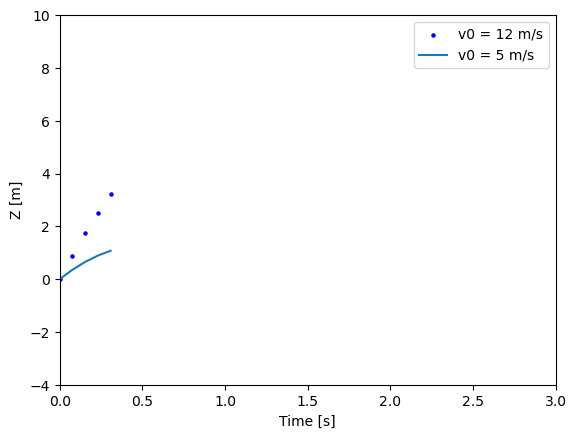

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')


line2.set_xdata(t[:5])
line2.set_ydata(z2[:5])
ax.legend()
scat.set_offsets(np.stack([t[:5], z[:5]], axis=1))

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

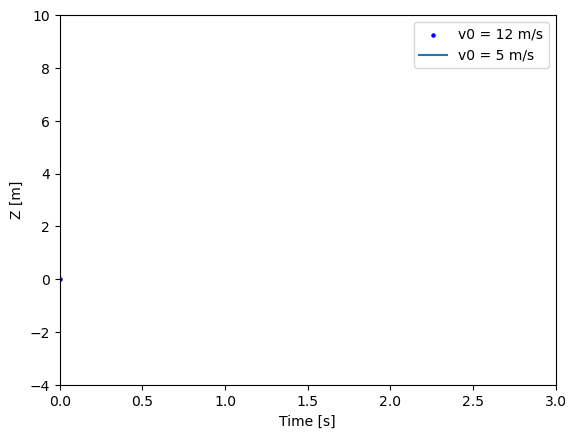

In [15]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = FuncAnimation(fig=fig, func=update, frames=40, interval=30)

In [16]:
from IPython.display import HTML

HTML(ani.to_jshtml())